In [2]:
import pandas as pd
import nltk
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
import nltk
# Download the Vader Lexicon resource
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    if pd.isna(text):
      return ''
    # Apply spaCy's English tokenizer
    doc = nlp(text)

    # Lemmatize and remove stopwords and punctuation
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    # Remove numbers and non-alphanumeric characters
    tokens = [token for token in tokens if token.isalpha()]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Read the CSV file into a DataFrame
df = pd.read_csv("amazon_reviews.csv")

# Apply text preprocessing to each row in the DataFrame
df['new_verified_reviews'] = df['verified_reviews'].apply(preprocess_text)

# Optionally, save the DataFrame with preprocessed text to a new CSV file
df.to_csv("preprocessed_data.csv", index=False)

# Display the first few rows of the DataFrame with preprocessed text
print(df.tail())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


      rating       date   variation  \
3145       5  30-Jul-18  Black  Dot   
3146       5  30-Jul-18  Black  Dot   
3147       5  30-Jul-18  Black  Dot   
3148       5  30-Jul-18  White  Dot   
3149       4  29-Jul-18  Black  Dot   

                                       verified_reviews  feedback  \
3145  Perfect for kids, adults and everyone in betwe...         1   
3146  Listening to music, searching locations, check...         1   
3147  I do love these things, i have them running my...         1   
3148  Only complaint I have is that the sound qualit...         1   
3149                                               Good         1   

                                   new_verified_reviews  
3145                                  Perfect kid adult  
3146  listen music search location check time look w...  
3147  love thing run entire home tv light thermostat...  
3148  complaint sound quality great use command dot ...  
3149                                               good  


In [ ]:
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['verified_reviews'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Categorize sentiment as positive, neutral, or negative
df['sentiment'] = pd.cut(df['sentiment_score'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

# Visualize sentiment distribution
sentiment_distribution = df['sentiment'].value_counts(normalize=True)
print("Sentiment Distribution:")
print(sentiment_distribution)

# Step 4: Explore specific products or categories
# Example: Calculate sentiment distribution for each product
product_sentiment_distribution = df.groupby('variation')['sentiment'].value_counts(normalize=True)
product_sentiment_distribution

# Step 5: Identify key themes or factors contributing to satisfaction/dissatisfaction
# Example: Perform topic modeling or sentiment analysis on review text

# Step 6: Investigate sentiment distribution across different product categories
# Example: Calculate sentiment distribution for each product category

# Step 7: Build predictive models
# Example: Split data into training and testing sets
# Example: Train a classifier to predict sentiment based on review text


Sentiment Distribution:
sentiment
positive    0.815000
neutral     0.117857
negative    0.067143
Name: proportion, dtype: float64


variation             sentiment
Black                 positive     0.735632
                      neutral      0.145594
                      negative     0.118774
Black  Dot            positive     0.775194
                      neutral      0.143411
                      negative     0.081395
Black  Plus           positive     0.851852
                      neutral      0.100000
                      negative     0.048148
Black  Show           positive     0.811321
                      neutral      0.132075
                      negative     0.056604
Black  Spot           positive     0.800830
                      neutral      0.124481
                      negative     0.074689
Charcoal Fabric       positive     0.886047
                      neutral      0.081395
                      negative     0.032558
Heather Gray Fabric   positive     0.885350
                      neutral      0.089172
                      negative     0.025478
Oak Finish            positive     0.857143


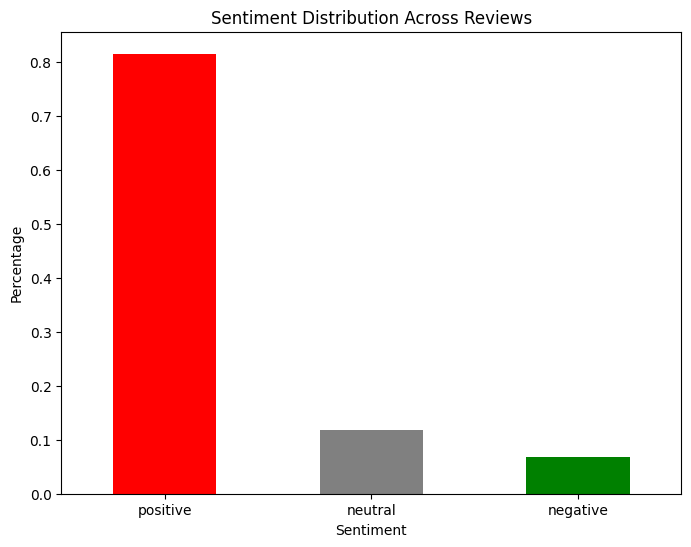

<Figure size 1200x800 with 0 Axes>

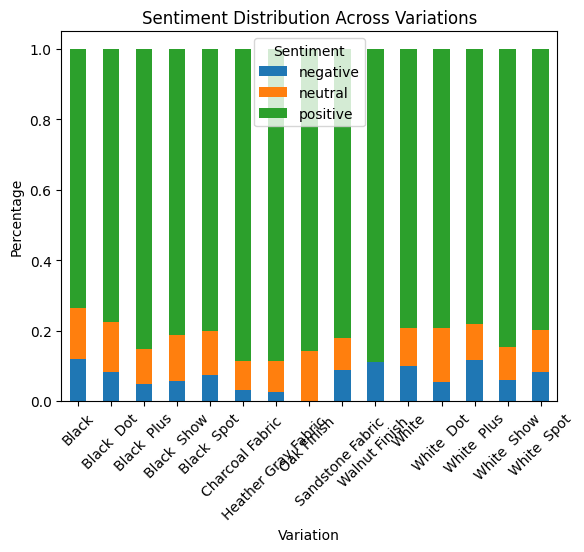

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming sentiment_distribution is already calculated
sentiment_distribution = df['sentiment'].value_counts(normalize=True)

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['red', 'grey', 'green'])
plt.title('Sentiment Distribution Across Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.show()

# Assuming 'variation' is the column you want to group by
# Calculate sentiment distribution for each variation
# Convert the multi-index Series to a DataFrame
product_sentiment_distribution = product_sentiment_distribution.unstack().fillna(0)

# Plotting the sentiment distribution for each variation
plt.figure(figsize=(12, 8))
product_sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Variations')
plt.xlabel('Variation')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sentiment')
plt.show()



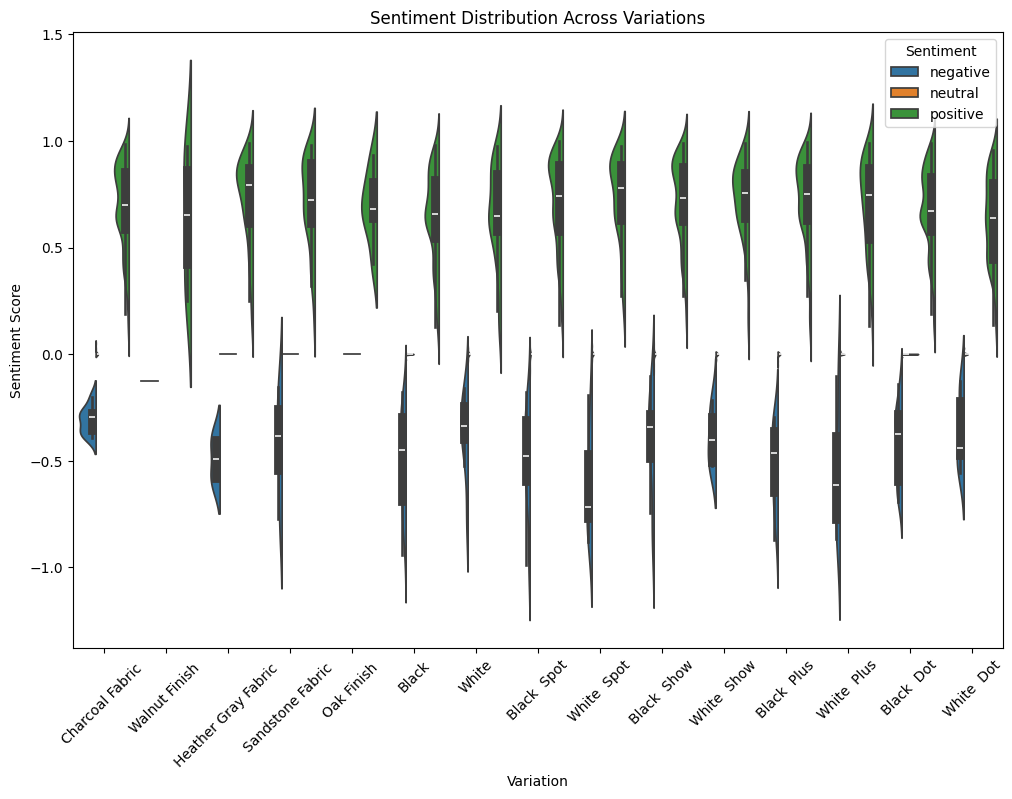

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='variation', y='sentiment_score', data=df, hue='sentiment', split=True)
plt.title('Sentiment Distribution Across Variations')
plt.xlabel('Variation')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


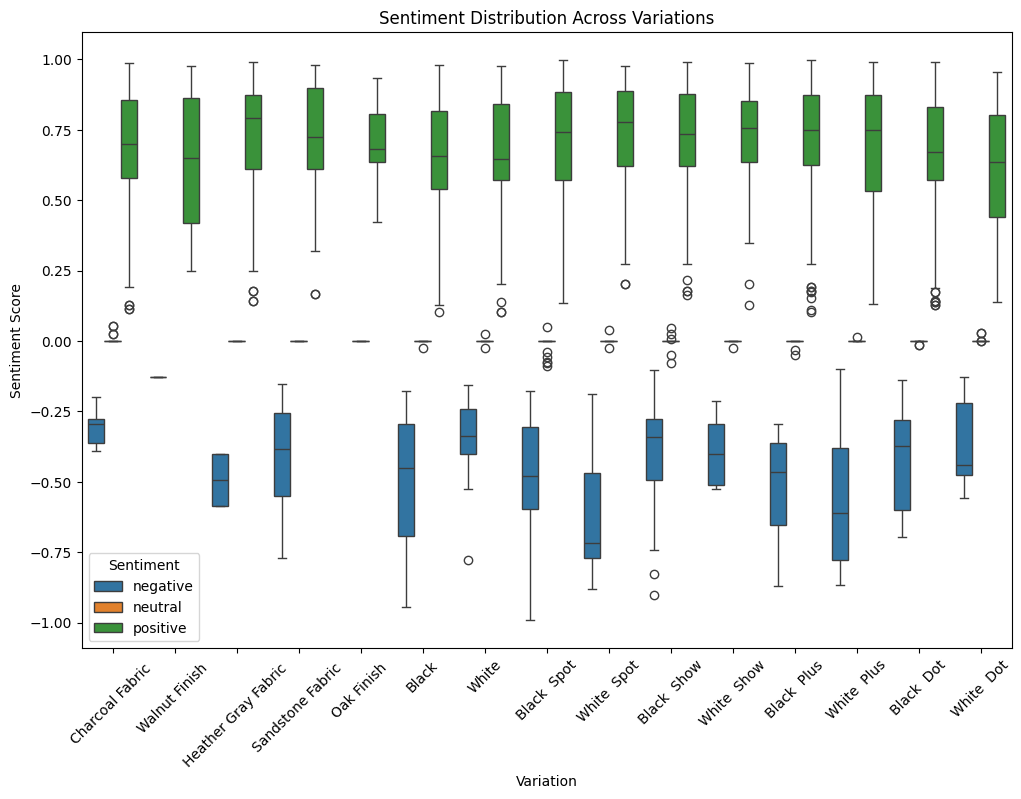

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='variation', y='sentiment_score', data=df, hue='sentiment')
plt.title('Sentiment Distribution Across Variations')
plt.xlabel('Variation')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


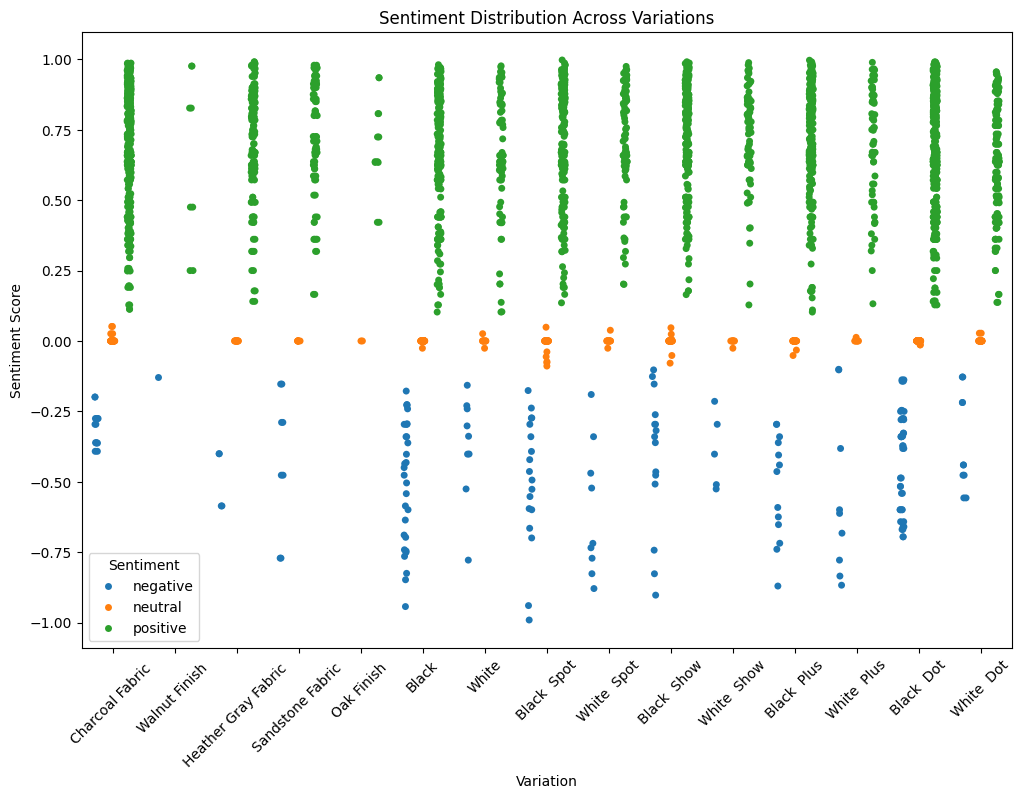

In [ ]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='variation', y='sentiment_score', data=df, hue='sentiment', dodge=True)
plt.title('Sentiment Distribution Across Variations')
plt.xlabel('Variation')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


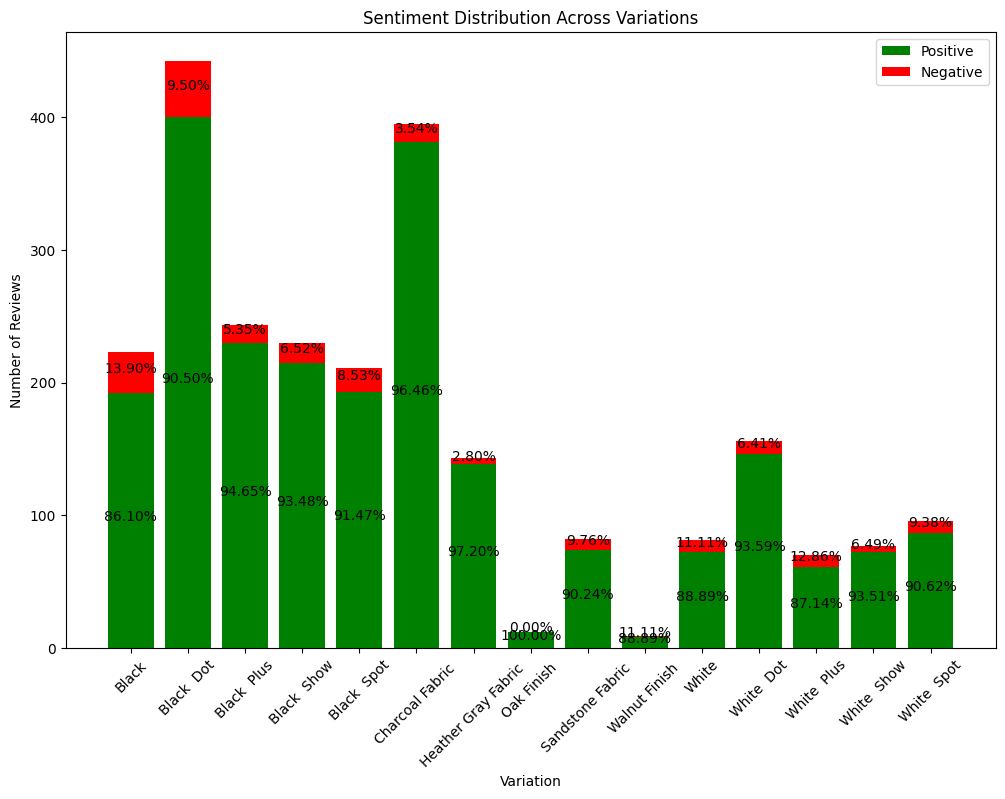

In [ ]:
# Calculate the total number of reviews for each variation
sentiment_counts['total'] = sentiment_counts['positive'] + sentiment_counts['negative']

# Calculate the percentage of positive and negative sentiments for each variation
sentiment_counts['positive_percentage'] = (sentiment_counts['positive'] / sentiment_counts['total']) * 100
sentiment_counts['negative_percentage'] = (sentiment_counts['negative'] / sentiment_counts['total']) * 100

# Plotting the sentiment distribution for each variation
plt.figure(figsize=(12, 8))

# Plot positive sentiment counts with percentages
plt.bar(sentiment_counts.index, sentiment_counts['positive'], label='Positive', color='green')
for i, value in enumerate(sentiment_counts['positive_percentage']):
    plt.text(i, sentiment_counts['positive'][i] / 2, f'{value:.2f}%', ha='center', color='black')

# Plot negative sentiment counts on top of positive sentiment counts with percentages
plt.bar(sentiment_counts.index, sentiment_counts['negative'], bottom=sentiment_counts['positive'], label='Negative', color='red')
for i, value in enumerate(sentiment_counts['negative_percentage']):
    plt.text(i, sentiment_counts['positive'][i] + sentiment_counts['negative'][i] / 2, f'{value:.2f}%', ha='center', color='black')

plt.title('Sentiment Distribution Across Variations')
plt.xlabel('Variation')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend()
plt.show()


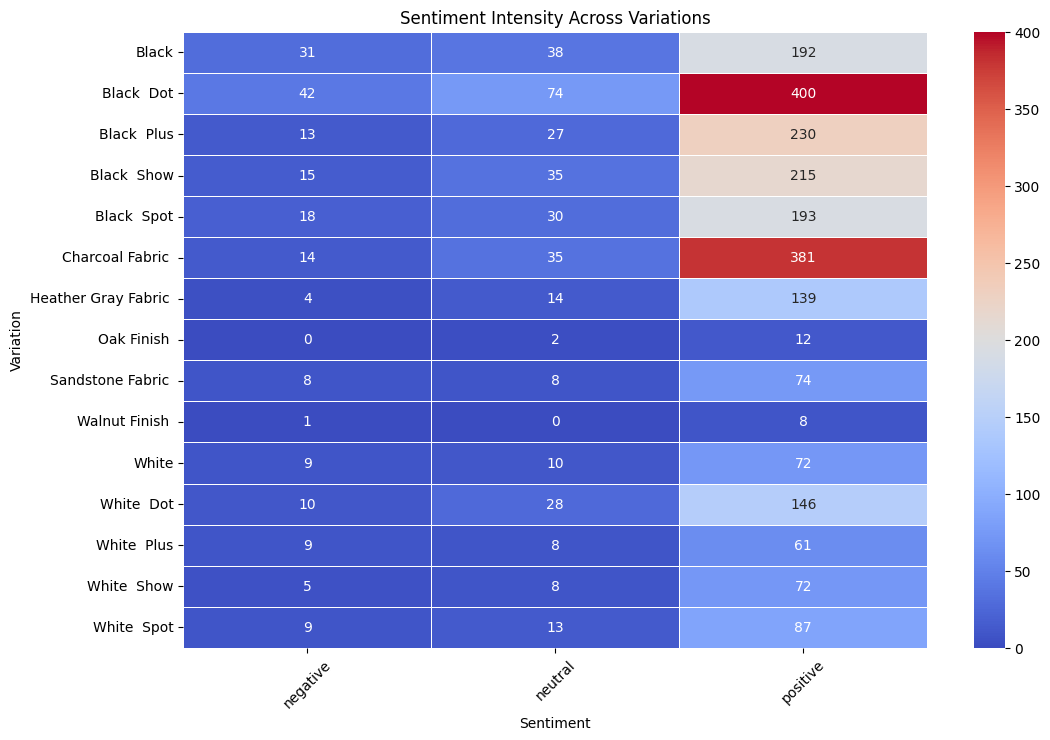

In [ ]:


# Count the number of positive and negative sentiments for each variation
sentiment_counts = df.groupby(['variation', 'sentiment']).size().unstack(fill_value=0)

# Plotting the sentiment intensity across variations
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_counts, annot=True, cmap='coolwarm', fmt='d', linewidths=.5)
plt.title('Sentiment Intensity Across Variations')
plt.xlabel('Sentiment')
plt.ylabel('Variation')
plt.xticks(rotation=45)
plt.show()


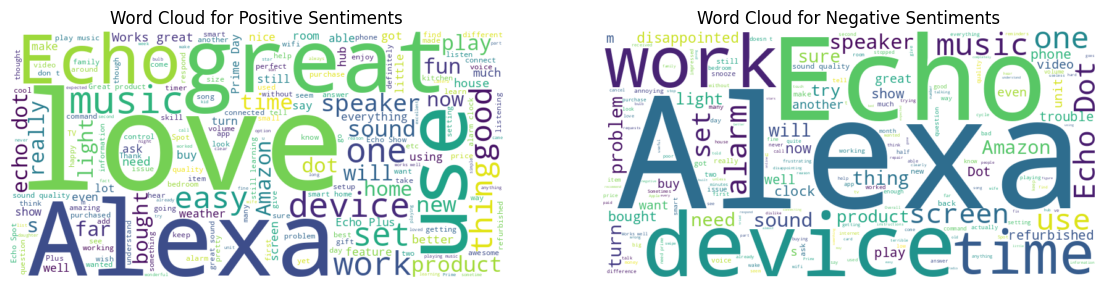

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['verified_reviews']
negative_reviews = df[df['sentiment'] == 'negative']['verified_reviews']


# Join all positive and negative reviews into single strings
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Generate word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments')
plt.axis('off')

plt.show()


Use sun burn instead

In [ ]:
import plotly.express as px

# Get word frequencies for positive and negative sentiments
positive_word_freq = positive_wordcloud.words_
negative_word_freq = negative_wordcloud.words_

# Convert word frequencies to dataframe
positive_df = pd.DataFrame(list(positive_word_freq.items()), columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(list(negative_word_freq.items()), columns=['Word', 'Frequency'])

# Add sentiment column
positive_df['Sentiment'] = 'Positive'
negative_df['Sentiment'] = 'Negative'

# Concatenate dataframes
df = pd.concat([positive_df, negative_df], ignore_index=True)

# Create sunburst plot
fig = px.sunburst(df, path=['Sentiment', 'Word'], values='Frequency')

# Update layout
fig.update_layout(title='Sunburst Plot of Word Frequencies by Sentiment',
                  title_x=0.5,
                  font=dict(family='Arial', size=12))

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Reset index to have 'variation' as a column
sentiment_counts_reset = sentiment_counts.reset_index()

# Melt the DataFrame to have a column for 'variation', 'sentiment', and 'count'
melted_df = sentiment_counts_reset.melt(id_vars='variation', var_name='sentiment', value_name='count')

# Create sunburst plot
fig = px.sunburst(melted_df, path=['variation', 'sentiment'], values='count')

# Update layout
fig.update_layout(title='Sunburst Plot of Sentiment Intensity Across Variations',
                  title_x=0.5,
                  font=dict(family='Arial', size=12))

# Show plot
fig.show()
